# ACS Subject Table Demo

## Introduction

This notebook demonstrates how to load and plot
[US Census American Community Survey (ACS) 5-year Subject Tables](https://api.census.gov/data/2022/acs/acs5/subject.html) and 
[US Census American Community Survey (ACS) 1-year Subject Tables](https://api.census.gov/data/2022/acs/acs1/subject.html).

## Imports and configuration

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.datasets import ACS1_SUBJECT, ACS5_SUBJECT

from matplotlib.ticker import FuncFormatter

## 5-year 

### Download data from the 5-year subject table

In [2]:
TOTAL_POPULATION_UNDER_5_VARIABLE = "S0101_C01_002E"

In [3]:
gdf = ced.download(
    ACS5_SUBJECT,
    2022,
    ["NAME", TOTAL_POPULATION_UNDER_5_VARIABLE],
    state="*",
    with_geometry=True,
)

### Plot the data

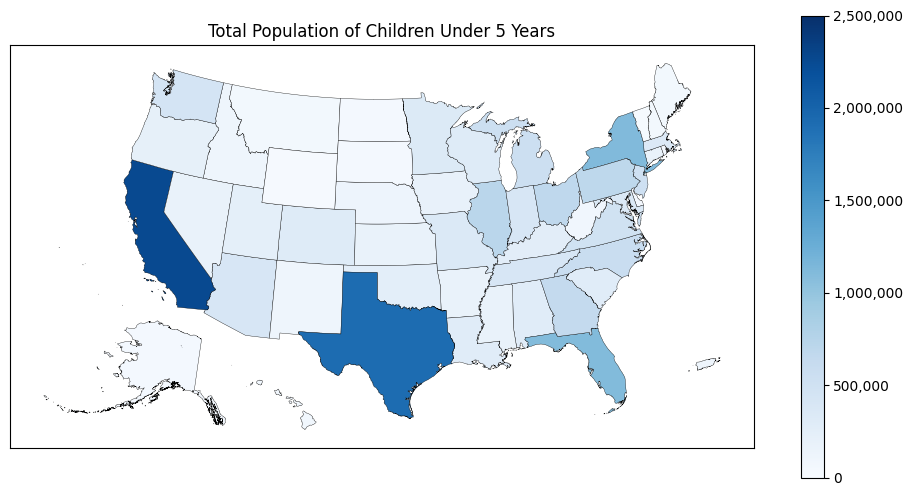

In [4]:
ax = cem.plot_us(
    gdf,
    TOTAL_POPULATION_UNDER_5_VARIABLE,
    figsize=(12, 6),
    legend=True,
    cmap="Blues",
    edgecolor="black",
    linewidth=0.25,
    vmin=-0,
    vmax=2_500_000,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"{x:,.0f}")},
)

ax.set_title("Total Population of Children Under 5 Years")

None

## 1-Year Data

### Download data from the 1-year subject table

In [5]:
MARRIED_COUPLE_HOUSEHOLDS_VARIABLE = "S2201_C01_004E"
TOTAL_HOUSEHOLDS_VARIABLE = "S2201_C01_001E"

In [6]:
gdf_1 = ced.download(
    ACS1_SUBJECT,
    2022,
    ["NAME", MARRIED_COUPLE_HOUSEHOLDS_VARIABLE, TOTAL_HOUSEHOLDS_VARIABLE],
    state="*",
    with_geometry=True,
)

### Compute the fraction of households with married couples

In [7]:
FRAC_MARRIED_COUPLE_HOUSEHOLDS = f"frac_{MARRIED_COUPLE_HOUSEHOLDS_VARIABLE}"

gdf_1[FRAC_MARRIED_COUPLE_HOUSEHOLDS] = (
    gdf_1[MARRIED_COUPLE_HOUSEHOLDS_VARIABLE] / gdf_1[TOTAL_HOUSEHOLDS_VARIABLE]
)

### Plot the data

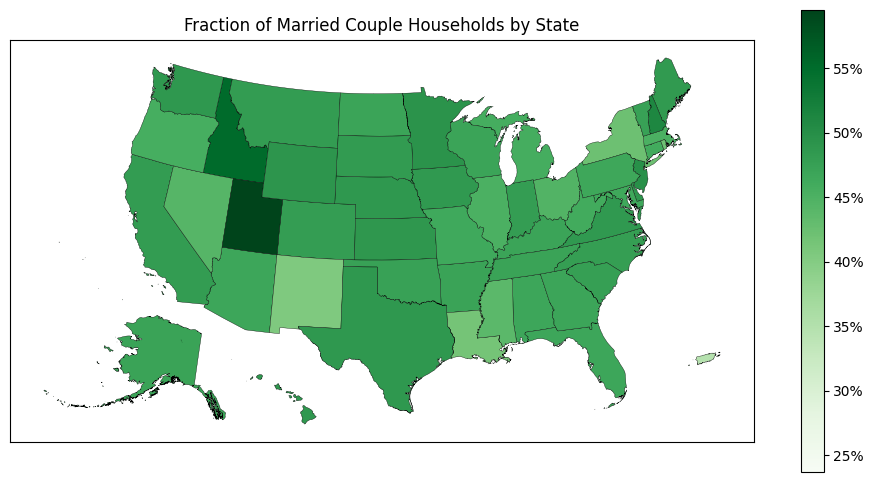

In [8]:
ax = cem.plot_us(
    gdf_1,
    FRAC_MARRIED_COUPLE_HOUSEHOLDS,
    figsize=(12, 6),
    legend=True,
    cmap="Greens",
    edgecolor="black",
    linewidth=0.25,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"{100*x:.0f}%")},
)

ax.set_title("Fraction of Married Couple Households by State")

None

### Largest and smallest fraction

In [9]:
gdf_1[["NAME", FRAC_MARRIED_COUPLE_HOUSEHOLDS]].nlargest(
    10, FRAC_MARRIED_COUPLE_HOUSEHOLDS
).reset_index()

,index,NAME,frac_S2201_C01_004E
0,44,Utah,0.595149
1,12,Idaho,0.552704
2,29,New Hampshire,0.512103
3,30,New Jersey,0.498588
4,23,Minnesota,0.494040
5,50,Wyoming,0.490418
6,7,Delaware,0.490197
7,16,Kansas,0.488632
8,43,Texas,0.487165
9,47,Washington,0.486760


In [10]:
gdf_1[["NAME", FRAC_MARRIED_COUPLE_HOUSEHOLDS]].nsmallest(
    10, FRAC_MARRIED_COUPLE_HOUSEHOLDS
).reset_index()

,index,NAME,frac_S2201_C01_004E
0,8,District of Columbia,0.237178
1,51,Puerto Rico,0.348910
2,31,New Mexico,0.405726
3,18,Louisiana,0.415070
4,39,Rhode Island,0.421339
5,32,New York,0.423051
6,24,Mississippi,0.438334
7,28,Nevada,0.442419
8,35,Ohio,0.445605
9,13,Illinois,0.451411


### Bar Chart

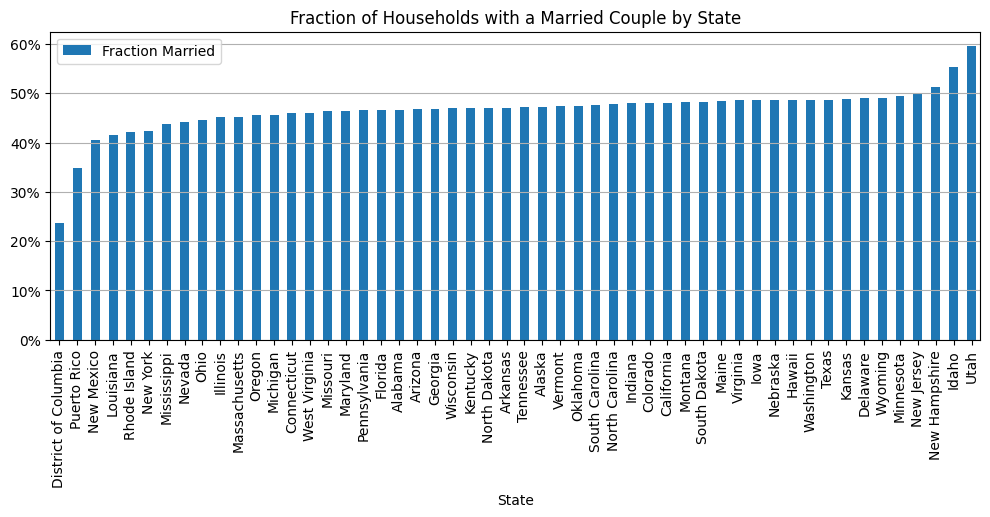

In [11]:
ax = gdf_1.sort_values(FRAC_MARRIED_COUPLE_HOUSEHOLDS).plot.bar(
    "NAME",
    FRAC_MARRIED_COUPLE_HOUSEHOLDS,
    label="Fraction Married",
    figsize=(12, 4),
)

ax.set_title("Fraction of Households with a Married Couple by State")
ax.set_xlabel("State")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f"{100*y:,.0f}%"))
ax.yaxis.grid(True)